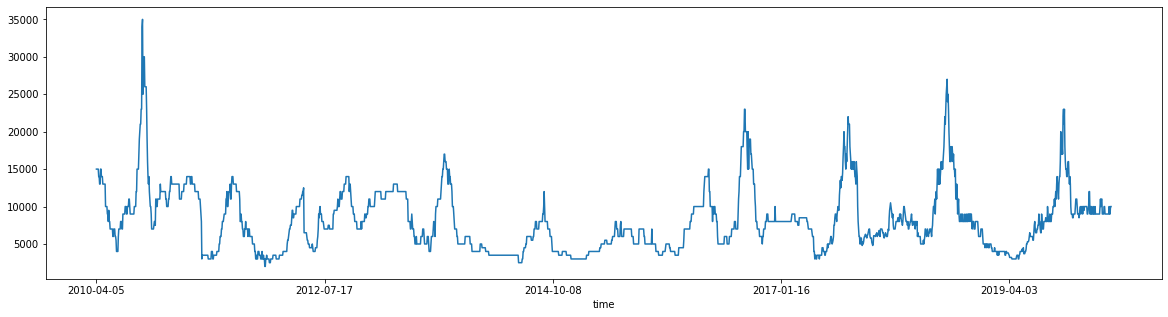

In [1]:
import pandas as pd

series = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ARIMA/csv/time2.csv', header=0, index_col=0, squeeze=True)
# 일정 구간 추출 (너무 많으면 계산이 어렵다고 함.)
series = series.truncate(before='2010-04-03', after='2020-04-03')
series.plot(figsize=(20, 5))

* AR: 자기회귀(Autoregression). 이전 관측값의 오차항이 이후 관측값에 영향을 주는 모형
* I: Intgrated. 누적을 의미하는 것으로, 차분을 이용하는 시계열모형들에 붙이는 표현
* MA: 이동평균(Moving Average). 관측값이 이전의 연속적인 오차항의 영향을 받는다는 모형
* AR모형의 Lag을 의미하는 p, MA모형의 Lag을 의미하는 q, 차분(Diffrence)횟수를 의미하는 d
* 통상적으로 p + q < 2, p * q = 0 인 값들을 많이 사용 (P+q < 2는 필수 조건은 아닌 듯)
* ACF(Autocorrelation function) : Lag에 따른 관측치들 사이의 관련성을 측정하는 함수
* PACF(Partial autocorrelation function) : k 이외의 모든 다른 시점 관측치의 영향력을 배제하고 Yt와 Yt-k 두 관측치의 관련성을 측정하는 함수
* 현실에 존재하는 시계열자료는 불안정(Non-stationary)한 경우가 많다. 그런데 AR(p), MA(q) 모형이나, 이 둘을 합한 ARMA(p, q)모형으로는 이러한 불안정성을 설명할 수가 없다. 
따라서 모형 그 자체에 이러한 비정상성을 제거하는 과정을 포함한것이 ARIMA모형이며 ARIMA(p, d, q)로 표현한다.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


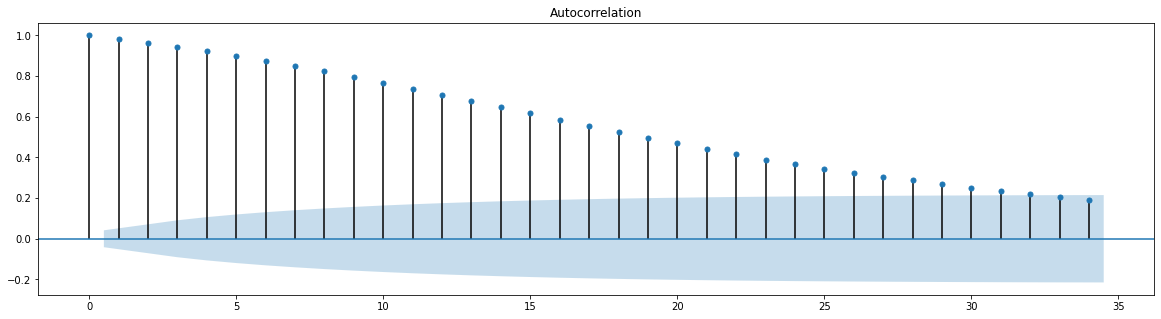

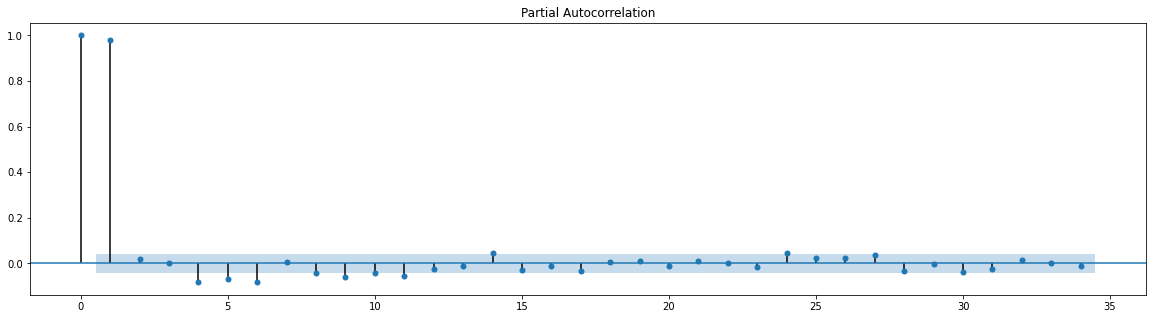

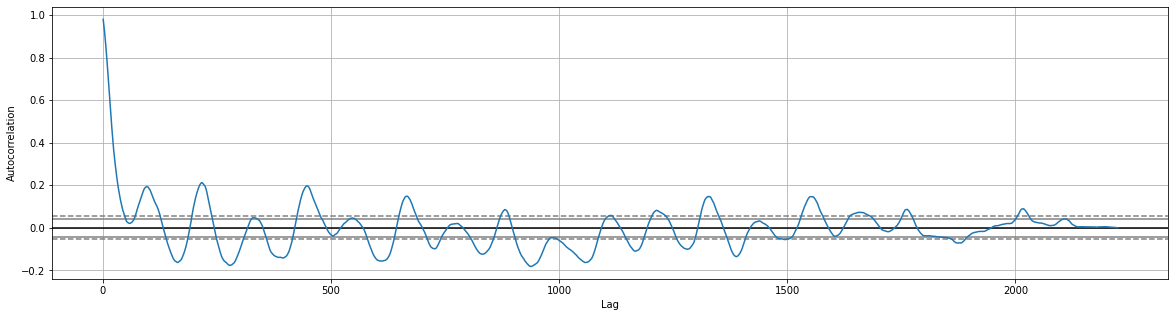

In [2]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot

fig, ax = plt.subplots(figsize=(20, 5))
plot_acf(series, ax=ax)
fig, ax = plt.subplots(figsize=(20, 5))
plot_pacf(series, ax=ax)
fig, ax = plt.subplots(figsize=(20, 5))
autocorrelation_plot(series, ax=ax)
plt.show()

* AR(p)를 선택할지, MA(q)를 선택학지?
* AR Lag이 약 7~8까지는 큼. p=8, d=1, q=0 모형 선택
* 적절한 차분 차수의 계산을 위해 우선 1차 차분을 하고, ACF 및 PACF를 다시 계산

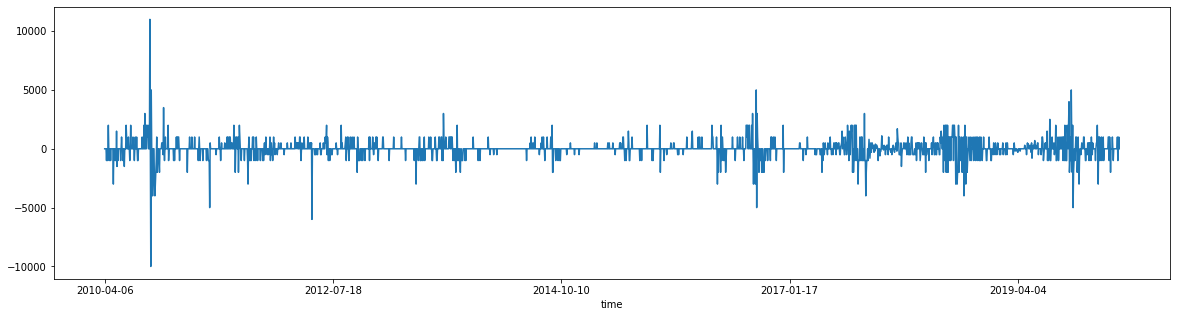

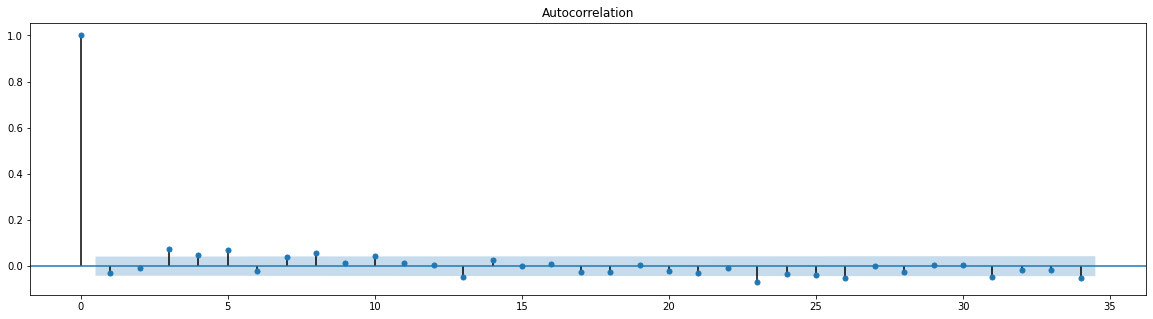

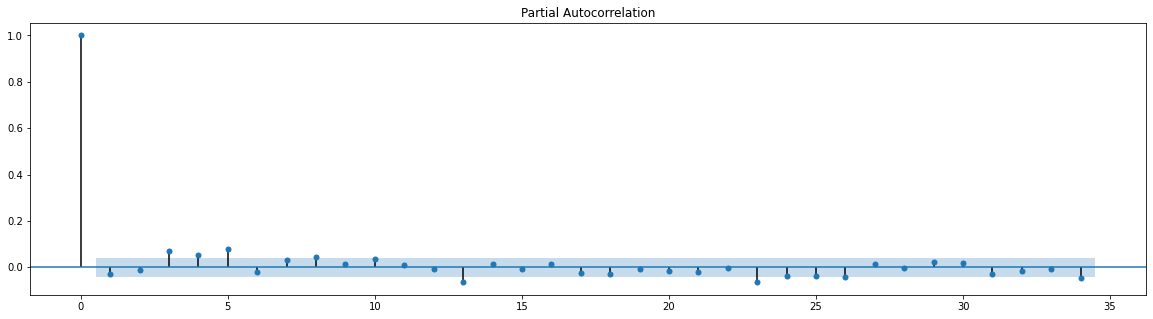

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(figsize=(20, 5))
diff_1=series.diff(periods=1).iloc[1:]
diff_1.plot(ax=ax)
fig, ax = plt.subplots(figsize=(20, 5))
plot_acf(diff_1, ax=ax)
fig, ax = plt.subplots(figsize=(20, 5))
plot_pacf(diff_1, ax=ax)
plt.show()

* 차분이후의 ACF와 PACF를 보니, 시계열이 정상상태(Stationary)를 보이는것으로 생각되므로, 1차차분 만으로 충분
* ARIMA(8,1,0)을 이용하여 모형의 Parameter를 추정하고, 결과를 확인

In [4]:
from statsmodels.tsa.arima_model import ARIMA

# (p,d,q) order
model = ARIMA(series, order=(8,1,0))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 2223
Model:                 ARIMA(8, 1, 0)   Log Likelihood              -18051.742
Method:                       css-mle   S.D. of innovations            813.613
Date:                Fri, 29 May 2020   AIC                          36123.485
Time:                        12:45:20   BIC                          36180.551
Sample:                             1   HQIC                         36144.326
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.2376     21.651     -0.103      0.918     -44.673      40.198
ar.L1.D.price    -0.0364      0.021     -1.718      0.086      -0.078       0.005
ar.L2.D.price    -0.0140      0.021     

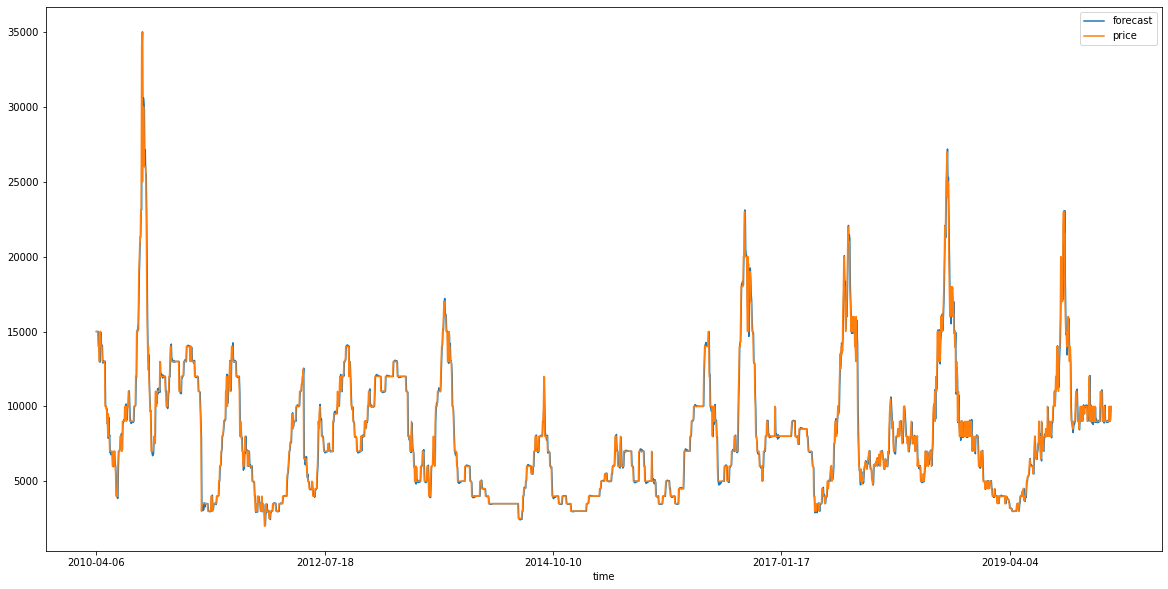

In [5]:
fig, ax = plt.subplots(figsize=(20, 10))
model_fit.plot_predict(ax=ax)
plt.show()

In [6]:
forecast, stderr, conf_int = model_fit.forecast(steps=100)
print(forecast)

[10004.96396004  9980.89868375 10084.298831   10165.24327233
 10092.76141773 10131.33925625 10183.65133127 10186.72622651
 10186.35670581 10185.63717323 10198.3822592  10200.65166041
 10195.70940106 10198.29197913 10199.73148028 10198.70253455
 10196.73679871 10195.25268416 10194.49034567 10192.56075814
 10190.40883211 10188.64072226 10186.73888702 10184.66105804
 10182.48081227 10180.36928253 10178.26443206 10176.06464128
 10173.85988375 10171.66969452 10169.46796519 10167.2489937
 10165.02211358 10162.80053651 10160.57543949 10158.34335332
 10156.11074732 10153.87833233 10151.64470166 10149.40931288
 10147.1733646  10144.93761041 10142.70130752 10140.46446503
 10138.22751249 10135.9905058  10133.75334899 10131.51602088
 10129.27864389 10127.0412512  10124.8037957  10122.56629244
 10120.32877183 10118.09123975 10115.85368914 10113.61612203
 10111.37854909 10109.14097161 10106.90338735 10104.66579828
 10102.42820686 10100.19061365 10097.95301826 10095.71542122
 10093.47782338 10091.240

In [7]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(series, order=(8,1,0))
model_fit = model.fit(trend='nc',full_output=True, disp=1)
print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 2223
Model:                 ARIMA(8, 1, 0)   Log Likelihood              -18051.748
Method:                       css-mle   S.D. of innovations            813.615
Date:                Fri, 29 May 2020   AIC                          36121.496
Time:                        12:45:22   BIC                          36172.855
Sample:                             1   HQIC                         36140.253
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
ar.L1.D.price    -0.0364      0.021     -1.720      0.086      -0.078       0.005
ar.L2.D.price    -0.0140      0.021     -0.661      0.509      -0.056       0.028
ar.L3.D.price     0.0706      0.021     

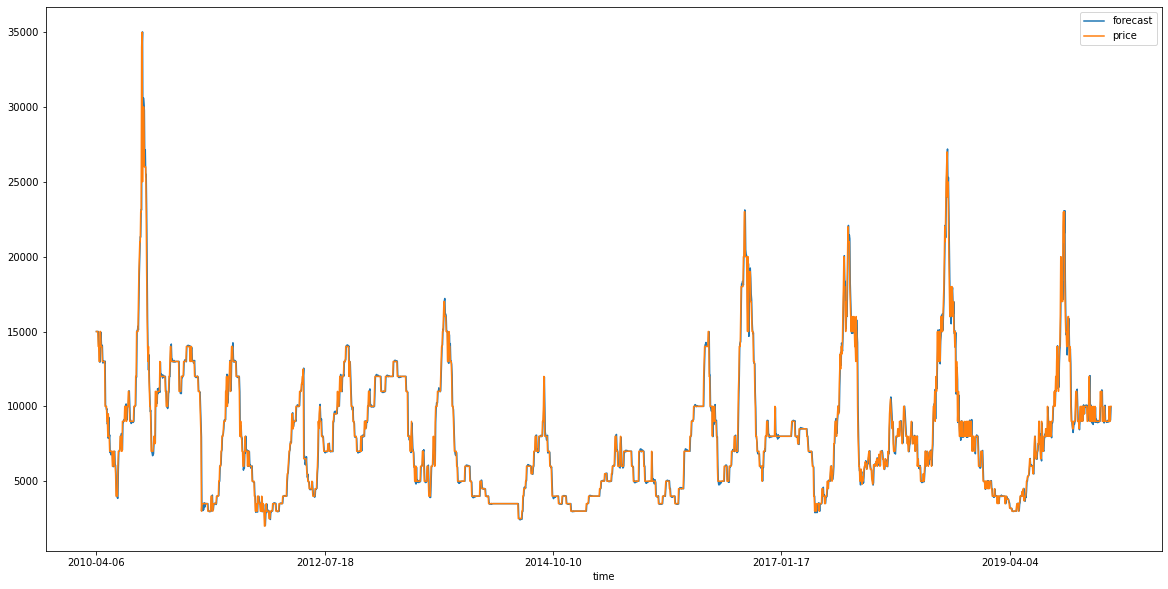

In [8]:
fig, ax = plt.subplots(figsize=(20, 10))
model_fit.plot_predict(ax=ax)
plt.show()

In [9]:
forecast, stderr, conf_int = model_fit.forecast(steps=100)
print(forecast)

[10006.72045674  9984.42993258 10089.56206258 10172.31046617
 10101.73957726 10142.37377174 10196.697248   10201.82859216
 10203.61861373 10205.07076359 10219.99228047 10224.44421221
 10221.70514502 10226.50430305 10230.15751018 10231.34818678
 10231.60963377 10232.35527015 10233.82339983 10234.12525077
 10234.2072272  10234.67412467 10235.00731692 10235.16515351
 10235.22126299 10235.3464257  10235.47835502 10235.51550001
 10235.5479299  10235.59503059 10235.63062134 10235.64903821
 10235.65961703 10235.67553589 10235.68794722 10235.69339066
 10235.69833891 10235.70348893 10235.70742855 10235.70961763
 10235.71125462 10235.71308956 10235.71437762 10235.71512865
 10235.71577207 10235.71636252 10235.71680358 10235.7170742
 10235.71729672 10235.71750393 10235.71764859 10235.71774578
 10235.71782587 10235.71789461 10235.71794492 10235.71797883
 10235.71800699 10235.71803065 10235.71804757 10235.7180597
 10235.71806951 10235.71807755 10235.71808341 10235.71808763
 10235.71809108 10235.7180